In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor


In [2]:
df1 = pd.read_csv('E:/Fall_2023/stat628/module3/attempt2/fin_df.csv')

In [3]:
df1.head()

,Unnamed: 0,column_names,column_sums,avg_rat,week
0,0.0,00:00,5916,3.736991,Monday
1,0.5,00:30,5490,3.702877,Monday
2,1.0,01:00,5308,3.714396,Monday
3,1.5,01:30,4282,3.708505,Monday
4,2.0,02:00,4261,3.720795,Monday


In [4]:
week_dict = {'Friday': 5, 'Monday': 1, 'Saturday': 6, 'Sunday': 7, 'Thursday': 4, 'Tuesday': 2, 'Wednesday': 3}
for i in range(df1.shape[0]):
    df1.iloc[i, -1] = week_dict[df1.iloc[i, -1]]

In [5]:
hour_dict = {}
cnt = 1
for i in np.unique(df1['column_names']):
    hour_dict[i] = cnt
    cnt += 1
for i in range(df1.shape[0]):
    df1.iloc[i, 1] = hour_dict[df1.iloc[i, 1]]

In [6]:
df1.head()

,Unnamed: 0,column_names,column_sums,avg_rat,week
0,0.0,1,5916,3.736991,1
1,0.5,2,5490,3.702877,1
2,1.0,3,5308,3.714396,1
3,1.5,4,4282,3.708505,1
4,2.0,5,4261,3.720795,1


In [7]:
X = df1.iloc[:, [1, 4]]
X.head()

,column_names,week
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [8]:
y = df1['avg_rat']

In [9]:
from sklearn import tree # for tree.plot_tree()
from sklearn.tree import export_text # for export_text()
from matplotlib import pyplot as plt

In [10]:
model = DecisionTreeRegressor(criterion='squared_error', max_depth=4)
model.fit(X, y)
model.score(X, y)

0.8548139841106469

In [11]:
feature_names = ['Open_Hour', 'week']

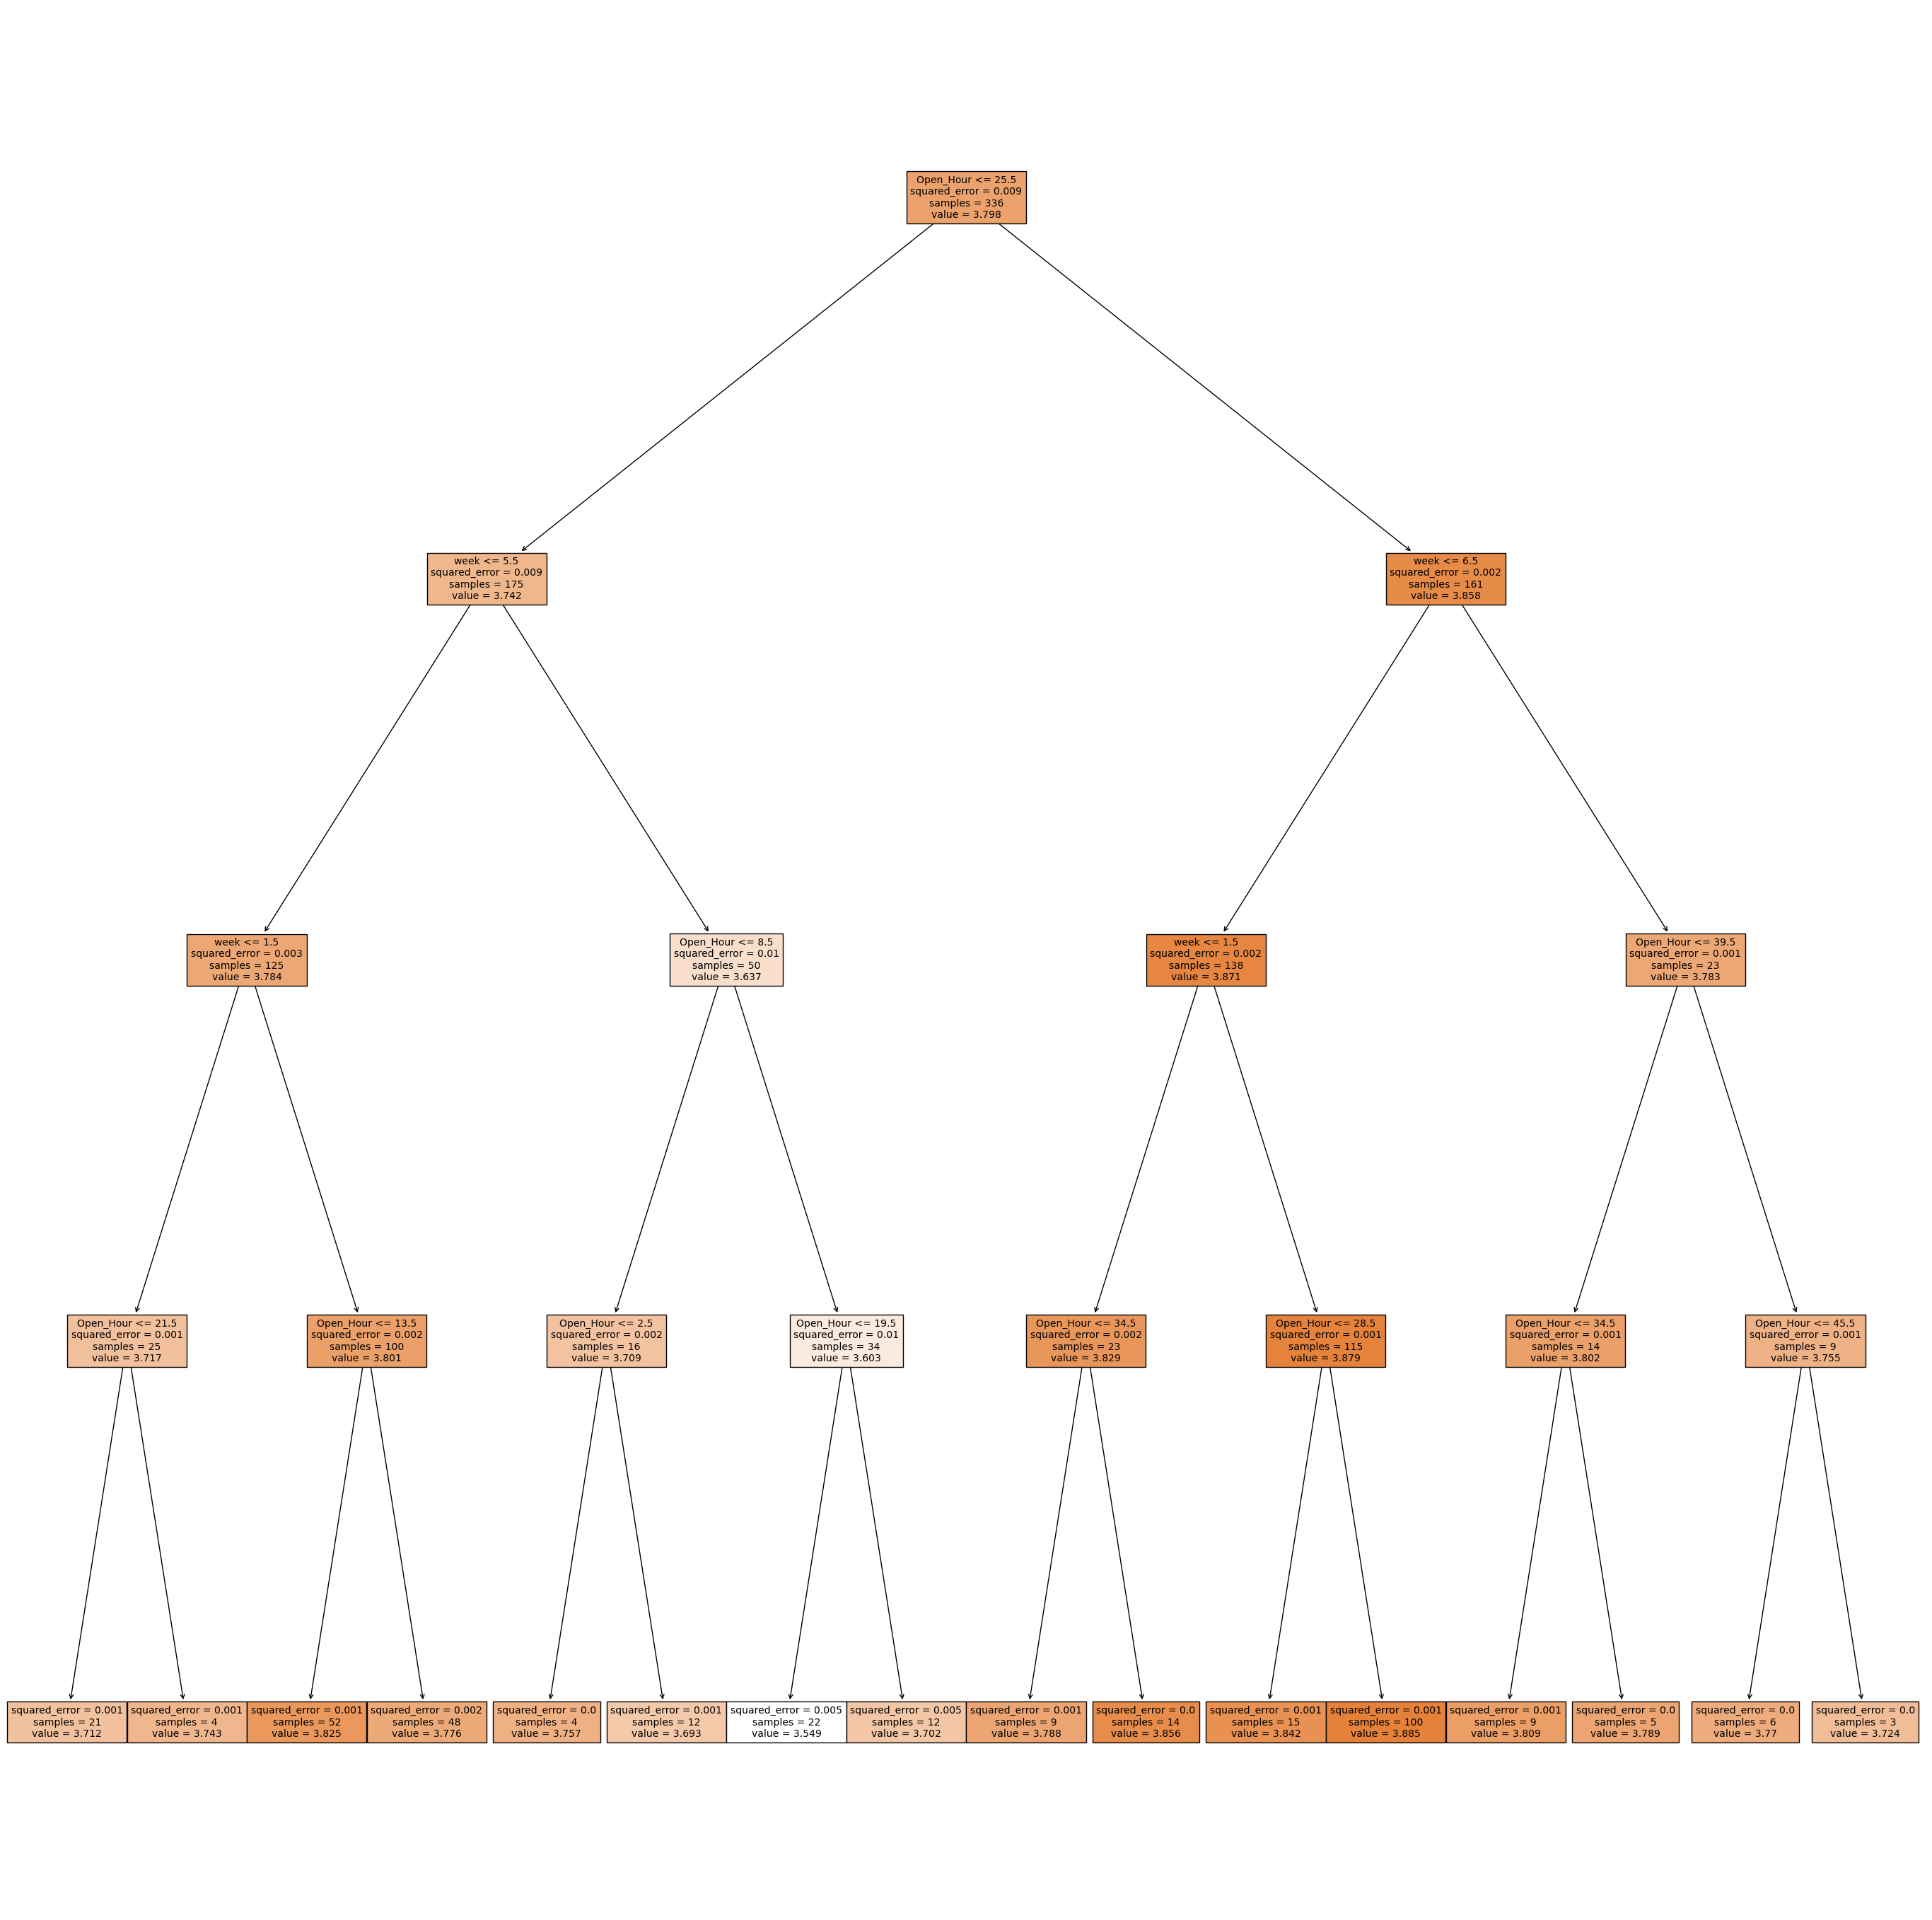

In [13]:
fig = plt.figure(figsize=(35, 35)) # (width, height) in inches
_ = tree.plot_tree(model, feature_names=feature_names, filled=True)
plt.savefig('E:/Fall_2023/stat628/module3/attempt2/Tree_OpenHour.png')

In [38]:
# print(export_text(model, feature_names=feature_names))

In [20]:
#!pip install graphviz

In [25]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
        model,
        out_file=None,#"E:/Fall_2023/stat628/module3/attempt2/Tree_OpenHour.dot",
        feature_names=feature_names,
        filled=True
    )

In [26]:
graph = graphviz.Source(dot_data, format="png") 
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [16]:
#!pip install pydot

In [15]:
#import pydot

#(graph,) = pydot.graph_from_dot_file('E:/Fall_2023/stat628/module3/attempt2/Tree_OpenHour.dot')
#graph.write_png('E:/Fall_2023/stat628/module3/attempt2/Tree_OpenHour.png')